In [1]:
# ***********************************************************************************
# Changelog
# *******

# Code written by Ousmane Diao 


#*************************************************************************************************
# ***********************************************************************************
# Imports

import warnings
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
import os
#os.chdir ('C:\\Users\\odiao\\Desktop\\Model paludisme')
os.chdir('C:\\Users\\odiao\\Dropbox\\Model paludisme')
df = pd.read_csv('Dakar.csv', header=0, infer_datetime_format=False, parse_dates=[0])
bd = pd.read_csv('Data_by_district.csv', header=0, infer_datetime_format=False, parse_dates=[0])

#***************************************************************************************************
#Defined the avaerage temperature
AVT_Dakar=(df.Tempmin_Dakar + df.Tempmax_Dakar)/2
AVT_Fatick=(df.Tempmin_Fatick + df.Tempmax_Fatick)/2
AVT_Kedougou=(df.Tempmin_Kedougou + df.Tempmax_Kedougou)/2


warnings.filterwarnings("ignore") 

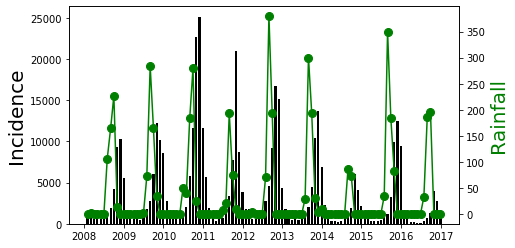

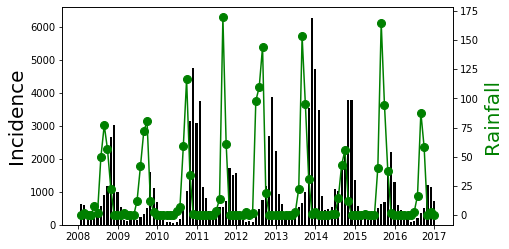

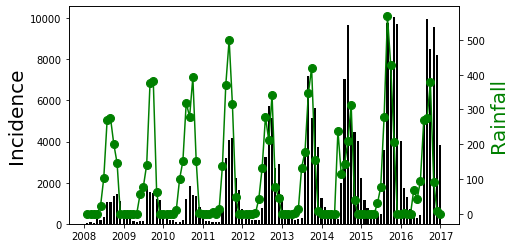

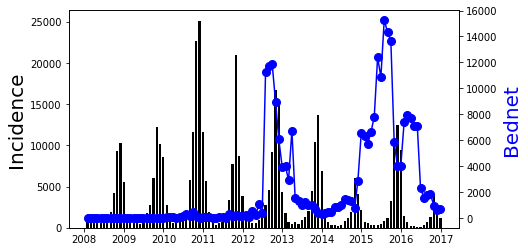

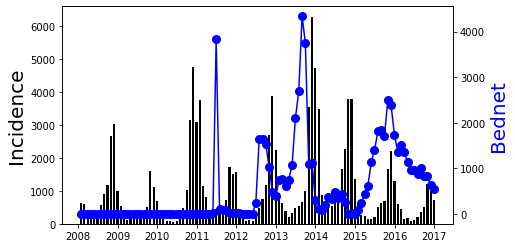

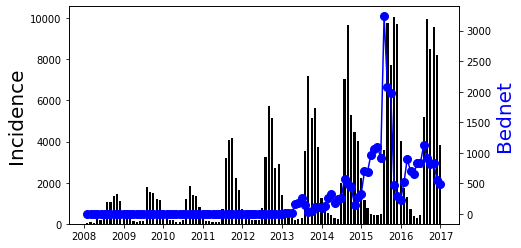

In [3]:
Vect=[(df['MC_Dakar'], df['Rainfall']), (df['MC_Fatick'], df['Rainfall_F']), (df['MC_Kedougou'], df['Rainfall_K']), 
      (df['MC_Dakar'], df['Milda_D']), (df['MC_Fatick'], df['Milda_F']), (df['MC_Kedougou'], df['Milda_K'])]

for p in np.arange(0, len(Vect)):
    fig, ax1=plt.subplots(figsize=(7,4))
    ax2=ax1.twinx()
    ax1.bar(df.Date, Vect[p][0], width= 20, align='center', color = "black" )
    if p<3:
        ax2.plot(df.Date, Vect[p][1], color = "green", marker='o', markersize=8)
        ax2.set_ylabel("Rainfall", color='green', fontsize=20)
    else:
        ax2.plot(df.Date, Vect[p][1], color = "blue", marker='o', markersize=8)
        ax2.set_ylabel("Bednet", color='blue', fontsize=20)
    ax1.set_ylabel("Incidence", fontsize=20)  
    ax2.set_xlabel("Date [months]", fontsize=20)
    plt.show()

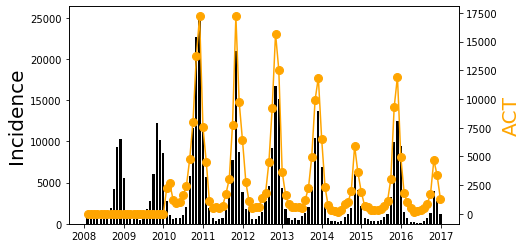

In [4]:
Vect_2=[(df['MC_Dakar'], df['ACT_D']), (df['MC_Fatick'], df['ACT_F']), (df['MC_Kedougou'], df['ACT_K'])]
p=0
fig, ax1=plt.subplots(figsize=(7,4))
ax2=ax1.twinx()
ax1.bar(df.Date, Vect_2[p][0], width= 20, align='center', color = "black" )
ax2.plot(df.Date, Vect_2[p][1], color = "orange", marker='o', markersize=8)
ax1.set_ylabel("Incidence", fontsize=20) 
ax2.set_ylabel("ACT", color='orange', fontsize=20) 
ax2.set_xlabel("Date [months]", fontsize=20)
plt.show()
#fig.savefig('C:/Users/odiao/Dropbox/Model paludisme/figures_palu_rapport/ACT_dk.eps')   # save the figure to file
#plt.close(fig)

*************************************************************************


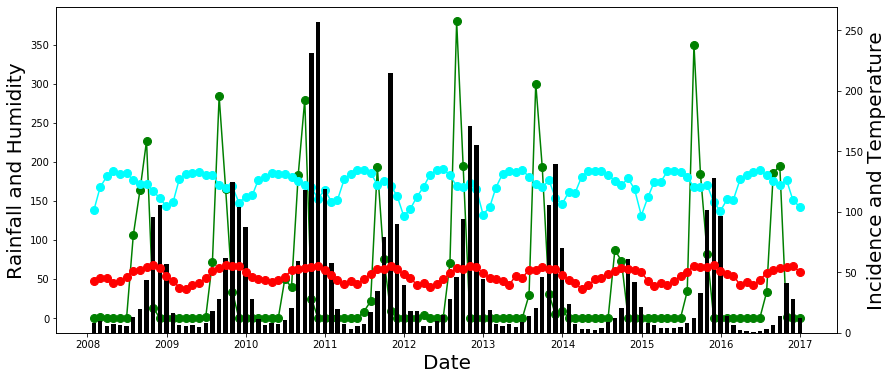

*************************************************************************


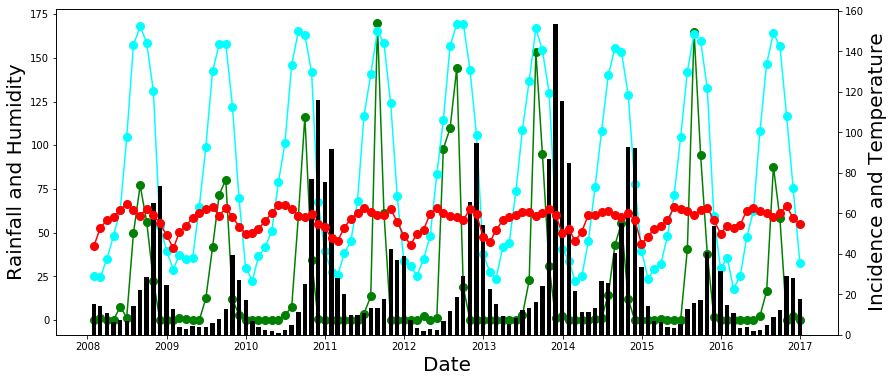

*************************************************************************


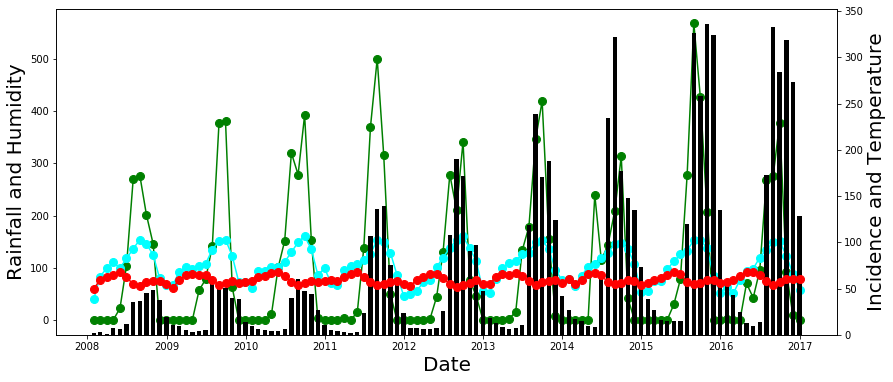

In [5]:
# Supperposion of curves
Dakar = np.c_[df.MC_Dakar, df.Rainfall, AVT_Dakar, df.Humidity_D]
Fatick= np.c_[df.MC_Fatick, df.Rainfall_F, AVT_Fatick, df.Humidity_F]
Kedougou= np.c_[df.MC_Kedougou, df.Rainfall_K, AVT_Kedougou, df.Humidity_K] 
      
for site in [Dakar, Fatick, Kedougou]:  
    print("*************************************************************************")
    #print("**********************************",site,"***********************")
    #************* Plots *******************************
    fig, ax1=plt.subplots(figsize=(14,6))
    ax2=ax1.twinx()
    ax1.plot(df['Date'], site[:,1], label="Rainfall", color = "green", marker='o', markersize=8)
    ax1.plot(df['Date'], site[:,3]*2, label="Humidity", color = "cyan", marker='o', markersize=8)
    ax2.bar(df.Date, site[:,0]/min(site[:,0]), label="Incidence", width= 20, align='center', color = "black" )
    #ax2.plot(df['Date'], site[:,0]/min(site[:,0]), label="Incidence", color = "black", marker='o', markersize=8)
    ax2.plot(df['Date'], site[:,2]*2, label="Temperature", color = "red", marker='o', markersize=8)
    ax1.set_ylabel("Rainfall and Humidity",fontsize=20) 
    ax2.set_ylabel("Incidence and Temperature",fontsize=20) 
    #fig.legend(fontsize=20)
    ax1.set_xlabel("Date", fontsize=20)
    plt.show()
    #fig.savefig('C:/Users/odiao/Dropbox/Model paludisme/figures_palu_rapport/supperposition_kd.eps')   # save the figure to file
    #plt.close(fig)